In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
train_data = pd.read_csv("hw1_15_train.dat",
                         names = ["x{0}".format(i) for i in range(1,5)]+["y"],
                         delim_whitespace=True)
train_data.insert(0,"x0",1)
x = np.array(train_data.iloc[:,:-1])
y = np.array(train_data["y"])

In [3]:
def sign(n):
    if n>0:
        return 1
    else:
        return -1

In [4]:
def PLA(w0,index_order, learning_rate = 1.0):
    iter_number = 0
    w=w0
    last_mistake_index = None
    index_order = np.array(index_order)
    learning_rate_vector = np.zeros_like(w0)+learning_rate
    learning_rate_vector[0] = 1.0
    while True:
        find_mistake = False
        for i in index_order:
            product = sum(x[i]*w)
            if not sign(product) == sign(y[i]):
                w = w + x[i]*learning_rate_vector*y[i]
                iter_number +=1
                find_mistake = True
                last_mistake_index = i
                continue
        if not find_mistake:
            break
    return {"iteration_number":iter_number,
            "last_mistake_index":last_mistake_index, 
            "w":np.array(w)}

## Problem 15

In [5]:
PLA(np.zeros((5,)),range(len(y)))

{'iteration_number': 45,
 'last_mistake_index': 135,
 'w': array([-3.       ,  3.0841436, -1.583081 ,  2.391305 ,  4.5287635])}

## Problem 16

In [6]:
iteration_number_set = []
for i in range(2000):
    index_order = range(len(y))
    random.seed(i)
    random.shuffle(index_order)
    w0 = np.zeros((5,))
    n = PLA(w0,index_order)["iteration_number"]
    iteration_number_set.append(n)

Average Number: 39.9595


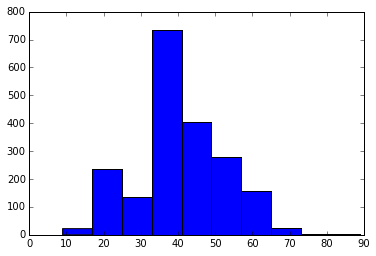

In [7]:
print "Average Number:", np.average(iteration_number_set)
plt.hist(iteration_number_set)
plt.savefig("p16")

## Problem 17

In [8]:
iteration_number_set = []
for i in range(2000):
    index_order = range(len(y))
    random.seed(i)
    random.shuffle(index_order)
    w0 = np.zeros((5,))
    n = PLA(w0,index_order,learning_rate=0.5)["iteration_number"]
    iteration_number_set.append(n)

Average Number: 41.9275


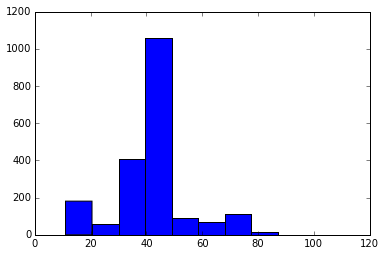

In [9]:
print "Average Number:", np.average(iteration_number_set)
plt.hist(iteration_number_set)
plt.savefig("p17.jpg")